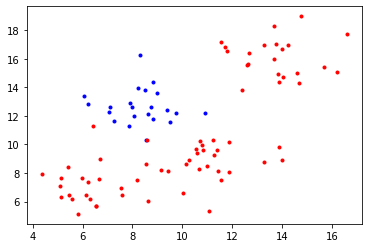

[[ 7  1]
 [ 0 22]]
0.9666666666666667


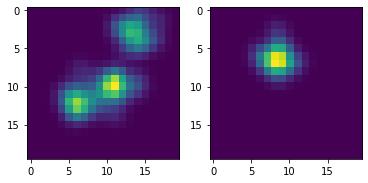

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math

[X_train, y_train, X_test, y_test] = np.load("TP4.npy",allow_pickle=True)
#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show()


def norm2(x, m, cov): # renvoie la proba qu'un point appartienne a la gaussienne 
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p
# PARTIE II 
def ddp_parzen(x,X,cov):
  sommation=0
  N=X.shape[0]
  for i in range(0,N):
    sommation+=norm2(x,X[i,:],cov)
  return sommation/N

#sigma trop faible on représente trop mal les densité on se rapproche des cas discret
#sigma trop grand sa bave
#sigma proche de 1 ou 2 proche des valeurs correctes

sigma = 1
cov = (sigma**2)*np.eye(2)


p_chair    =np.zeros([20,20])
p_non_chair  =np.zeros([20,20])

for x in range(0,20):
    for y in range(0,20):
        p_chair[y,x]   =ddp_parzen(np.array([x,y]),T_train,cov)
        A=10
        p_non_chair[y,x] =ddp_parzen(np.array([x,y]),F_train,cov)

plt.subplot(1,2,1)
plt.imshow(np.flipud(p_chair))#inverse le graphe pour correspondre
#plt.imshow(p_chair)
plt.subplot(1,2,2)
plt.imshow(np.flipud(p_non_chair)) # '' '' 
#plt.imshow(p_non_chair)

#PARTIE III


In [ ]:
#sigma = 1
sigma_list=np.linspace(start=0.5,stop=10,num=20)
cov=(sigma**2)*np.eye(2)

y_predict=np.zeros(X_test.shape[0])
for i in range(0,X_test.shape[0]):
  p_chair2= ddp_parzen(X_test[i,:],T_train,cov)#vraissemblance  p(x|y=chair)
  p_non_chair2=  ddp_parzen(X_test[i,:],F_train,cov)#vraissemblance p(x|y=non_chair)
  p_chair_posterior= p_chair2 * T_train.shape[0]
  p_non_chair_posterior = p_non_chair2*F_train.shape[0]
  if p_chair_posterior>p_non_chair_posterior:
    y_predict[i]=1   # pas besoin de faire de else car predict =0 de base

conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)
accuracy=np.sum(np.diag(conf_matrix))/np.sum(conf_matrix)

print(conf_matrix)
print(accuracy)

[[ 0  8]
 [ 0 22]]


[[ 7  1]
 [ 1 21]]
[[ 7  1]
 [ 0 22]]
[[ 6  2]
 [ 0 22]]
[[ 6  2]
 [ 0 22]]
[[ 6  2]
 [ 0 22]]
[[ 5  3]
 [ 0 22]]
[[ 3  5]
 [ 0 22]]
[[ 2  6]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[[ 0  8]
 [ 0 22]]
[0.93333333 0.96666667 0.93333333 0.93333333 0.93333333 0.9
 0.83333333 0.8        0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333]


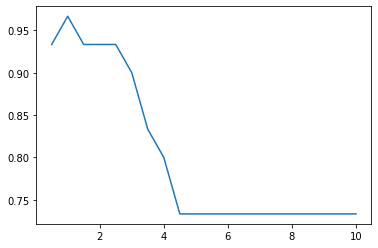

In [ ]:
#sigma = 1
#cov=(sigma**2)*np.eye(2

sigma_list=np.linspace(start=0.5,stop=10,num=20)
idx=0
accuracy=np.zeros(sigma_list.shape[0])
for sigma in sigma_list:
  cov=(sigma**2)*np.eye(2)


  y_predict=np.zeros(X_test.shape[0])
  for i in range(0,X_test.shape[0]):
    p_chair2= ddp_parzen(X_test[i,:],T_train,cov)#vraissemblance  p(x|y=chair)
    p_non_chair2= ddp_parzen(X_test[i,:],F_train,cov)#vraissemblance p(x|y=non_chair)
    p_chair_posterior= p_chair2 * T_train.shape[0]
    p_non_chair_posterior = p_non_chair2*F_train.shape[0]

    if p_chair_posterior>p_non_chair_posterior:
      y_predict[i]=1   # pas besoin de faire de else car predict =0 de base

  conf_matrix=confusion_matrix(y_test,y_predict)
  print(conf_matrix)
  accuracy[idx]=np.sum(np.diag(conf_matrix))/np.sum(conf_matrix)
  idx+=1
  
#print(accuracy)
plt.plot(sigma_list,accuracy)
plt.show()


# comprendre l'estimation de densité par noyau et le passage avec la loi de bAyes
# et la classification 

#on chute a partir de 3 avec un taux de classification de 75%

[[ 0  0  8]
 [ 0  0 22]
 [ 0  0  0]]
[0.73333333 0.9        0.9        0.9        0.93333333 0.86666667
 0.8        0.73333333 0.7        0.6        0.53333333 0.4
 0.36666667 0.3        0.         0.         0.         0.
 0.         0.        ]


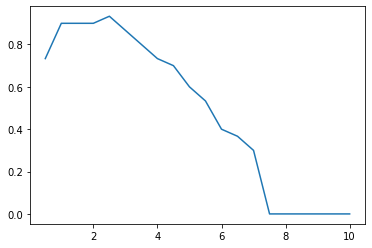

In [ ]:
#sigma = 1
#cov=(sigma**2)*np.eye(2

sigma_list=np.linspace(start=0.5,stop=10,num=20)
idx=0
accuracy=np.zeros(sigma_list.shape[0])
seuil=0.4  # on rajoute seuil 
for sigma in sigma_list:
  cov=(sigma**2)*np.eye(2)


  y_predict=np.zeros(X_test.shape[0])
  for i in range(0,X_test.shape[0]):
    p_chair2= ddp_parzen(X_test[i,:],T_train,cov)#vraissemblance  p(x|y=chair)
    p_non_chair2= ddp_parzen(X_test[i,:],F_train,cov)#vraissemblance p(x|y=non_chair)
    p_chair_posterior= p_chair2 * T_train.shape[0]
    p_non_chair_posterior = p_non_chair2*F_train.shape[0]
    if p_chair_posterior<seuil and p_non_chair_posterior<seuil:
      y_predict[i]=2
    else:

      if p_chair_posterior>p_non_chair_posterior:
        y_predict[i]=1   # pas besoin de faire de else car predict =0 de base

  conf_matrix=confusion_matrix(y_test,y_predict)
  accuracy[idx]=np.sum(np.diag(conf_matrix))/np.sum(conf_matrix)
  idx+=1

print(conf_matrix)
#print(accuracy)
plt.plot(sigma_list,accuracy)
plt.show()


# comprendre l'estimation de densité par noyau et le passage avec la loi de bAyes
# et la classification 

#on chute a partir de 3 avec un taux de classification de 75%